In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from os import path
from pathlib import Path  

In [2]:
gene_drug_data_file = path.join('/Users/louxuwen/Desktop/Documents/GitHub/SP23-BENG213/Project/Final Coding/data_matrix.csv') # Data matrix
pathway_drug_data_file = path.join('/Users/louxuwen/Desktop/Documents/GitHub/SP23-BENG213/Project/Final Coding/function_data_matrix.csv') # Data matrix
gene_drug_data = pd.read_csv(gene_drug_data_file,index_col = 0).fillna(0.0)
pathway_drug_data = pd.read_csv(pathway_drug_data_file,index_col = 0).fillna(0.0)

## Unsupervised Learning: UMAP and gene clustering ##

1. some helpful link：https://umap-learn.readthedocs.io/en/latest/basic_usage.html


UMAP with clustering

In [3]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from matplotlib.pyplot import figure
%matplotlib inline


# Dimension reduction and clustering libraries
import umap
import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

In [4]:
temp = gene_drug_data[gene_drug_data.columns.tolist()].values
gene_drug_data_scaled = StandardScaler().fit_transform(temp)
kmeans_labels = cluster.KMeans(n_clusters=82).fit_predict(gene_drug_data_scaled)

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [5]:
standard_embedding = umap.UMAP(random_state=42).fit_transform(gene_drug_data_scaled)

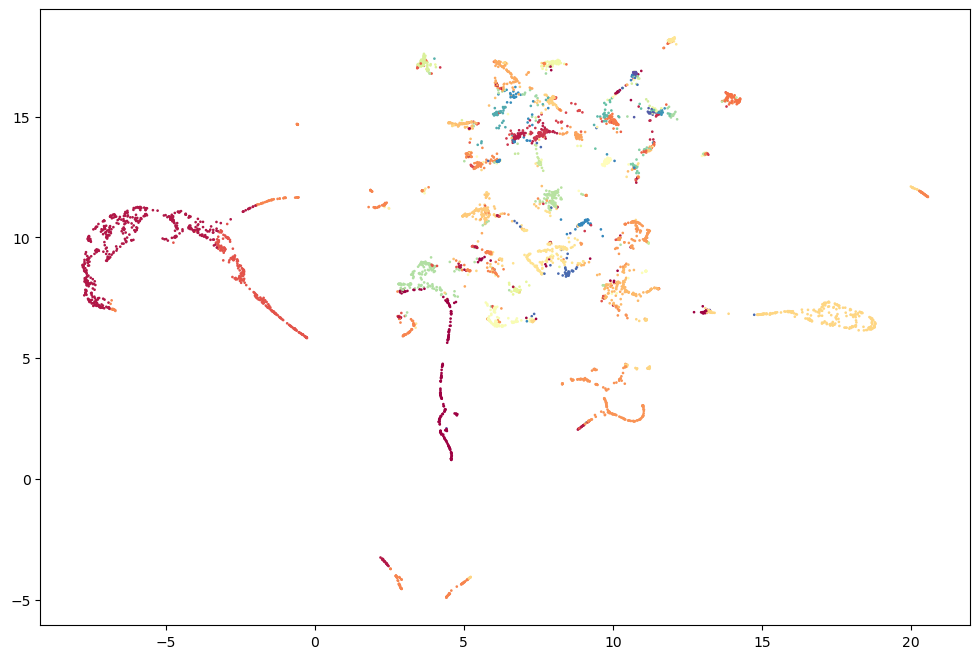

In [6]:
figure(figsize=(12, 8))
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=kmeans_labels, s=0.8, cmap='Spectral');

UMAP with hdb scan clustering results:
https://umap-learn.readthedocs.io/en/latest/clustering.html#traditional-clustering
hbdscan: https://hdbscan.readthedocs.io/en/latest/parameter_selection.html#selecting-min-samples

In [7]:
hdbscan_labels = hdbscan.HDBSCAN(min_samples=1, min_cluster_size=50).fit_predict(gene_drug_data_scaled)

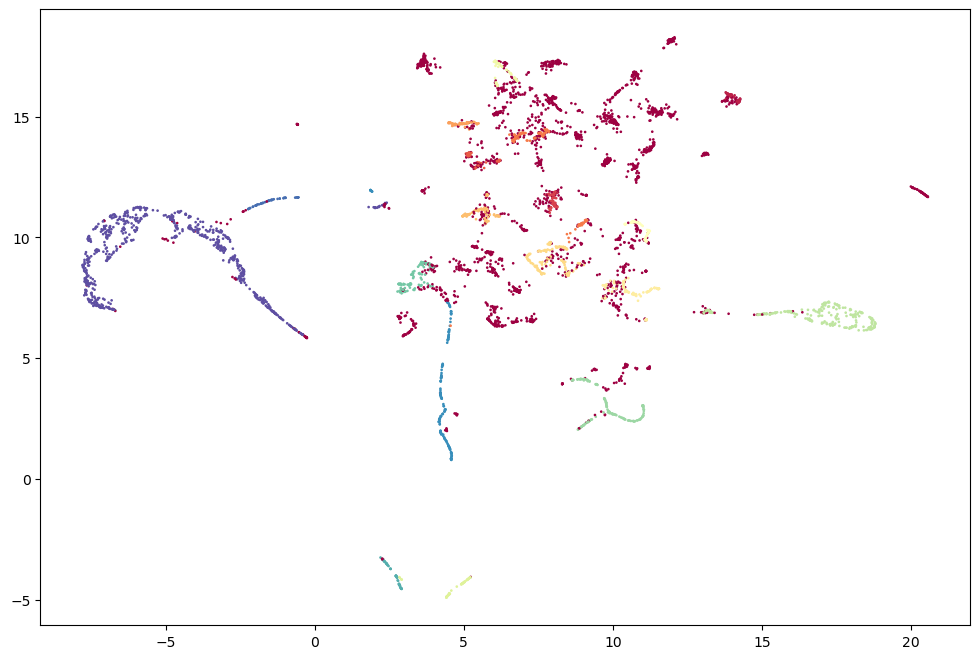

In [8]:
figure(figsize=(12, 8))
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=hdbscan_labels, s=0.8, cmap='Spectral');

In [14]:
genes = gene_drug_data.index.tolist()
labels = list(hdbscan_labels)

In [17]:
df = pd.DataFrame(labels, index = genes,columns = ['label'])

In [20]:
filepath = Path('/Users/louxuwen/Desktop/Documents/GitHub/SP23-BENG213/Project/gene_label.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df.to_csv(filepath)  

## Unsupervised Learning: UMAP and pathway clustering ##

In [3]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline


# Dimension reduction and clustering libraries
import umap
import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

import umap
reducer = umap.UMAP()

In [4]:
temp = pathway_drug_data[pathway_drug_data.columns.tolist()].values
pathway_drug_data_scaled = StandardScaler().fit_transform(temp)
kmeans_labels = cluster.KMeans(n_clusters=5).fit_predict(pathway_drug_data_scaled)

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


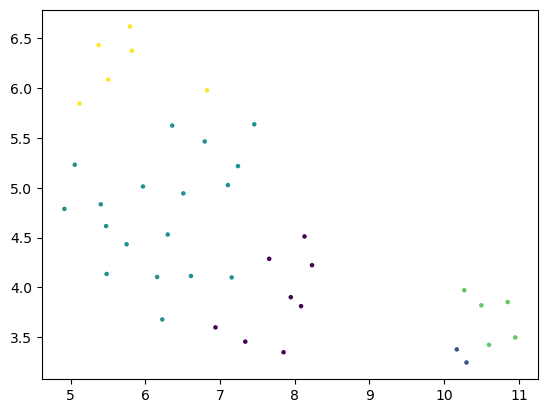

In [12]:
standard_embedding = umap.UMAP(random_state=42).fit_transform(pathway_drug_data_scaled)
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=kmeans_labels, s = 5)